In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("smooth.csv")
df2 = pd.read_csv("granules_example1.csv")
df3 = pd.read_csv("granules_example2.csv")

In [3]:
x = "Distance_(microns)"
y = "Gray_Value"

In [16]:
# TODO add distance -> steps calculations
def smooth(df, window_width=2):
    smoothed = []
    for i in range(len(df)):
        cur = df[x][i]
        left = i-1
        while left >= 0 and cur - df[x][left] < window_width:
            left -= 1
        left += 1
        right = i+1
        while right < len(df) and df[x][right] - cur < window_width:
            right += 1
        right -= 1 
        
        avg = df.iloc[left:right][y].mean()
        smoothed.append(avg)
    df["smoothed_average"] = smoothed
    
def find_peaks(df, window_width=20, min_diff=50, label="Gray_Value"):
    peaks = []
    unique_peaks = []

    peak = False
    for i in range(len(df)):
        cur = df[x][i]
        left = i-1
        while left >= 0 and cur - df[x][left] < window_width:
            left -= 1
        left += 1
        right = i+1
        while right < len(df) and df[x][right] - cur < window_width:
            right += 1
        right -= 1 
        
        left = df.iloc[left:i]
        right = df.iloc[i+1:right]
        
        cur_value = df[label][i]
        # boundaries can't be peaks
        if len(left) == 0 or len(right) == 0:
            peak = False
        elif cur_value - left[label].min() >= min_diff and cur_value - right[label].min() >= min_diff:
            if not peak:
                unique_peaks.append(([],[]))
            peak = True
            unique_peaks[-1][0].append(cur)
            unique_peaks[-1][1].append(cur_value)
        else:
            peak = False

        peaks.append(peak)
    
    df["is_peak"] = peaks
    return unique_peaks

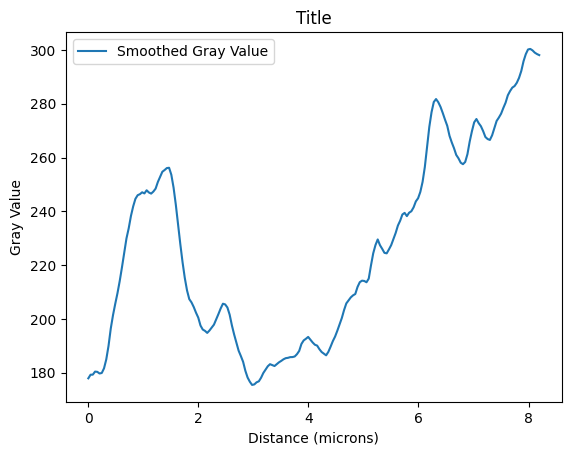

Number of unique peaks: 0


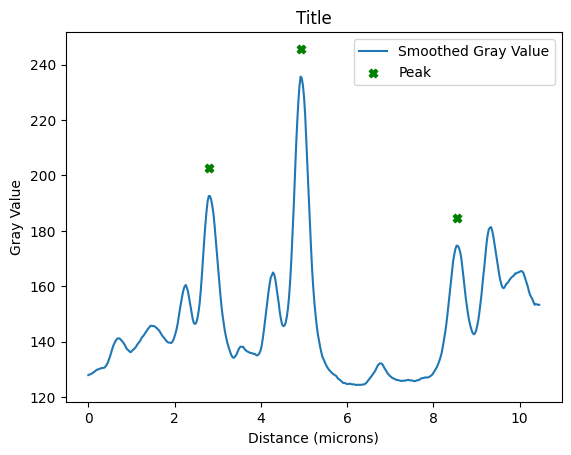

Number of unique peaks: 3


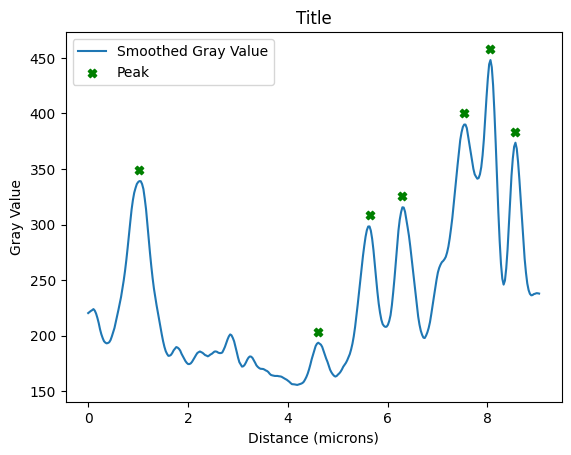

Number of unique peaks: 7


In [17]:
window_width = 0.4
min_diff = 30
use_average = True
smooth_window = 0.1

def plot_sample(df):
    smooth(df, window_width=smooth_window)
    unique_peaks = find_peaks(df, window_width=window_width, min_diff=min_diff, label="smoothed_average" if use_average else y)
    ax = sns.lineplot(data=df, x=x, y="smoothed_average" if use_average else y, label="Smoothed Gray Value" if use_average else y)

    ax.set(xlabel="Distance (microns)", ylabel="Gray Value", title="Title",)
#     sns.lineplot(data=df, x=x, y=y, linestyle="--")
#     sns.scatterplot(data=df, x=x, y=y, hue="is_peak")
#     plt.scatter(peak_locations[0], peak_locations[1], color="g", marker="o", label="Peak")
    for i, peak_locations in enumerate(unique_peaks):
#         plt.plot(peak_locations[0], peak_locations[1], color="r", label="Peak" if i == 0 else None)
        highest = peak_locations[1].index(max(peak_locations[1]))
        plt.scatter([peak_locations[0][highest]], [peak_locations[1][highest]+ 10], marker="X", color="g", label="Peak" if i == 0 else None)
    plt.legend()
    plt.show()
    print(f"Number of unique peaks: {len(unique_peaks)}")
    return len(unique_peaks)
    

for df in (df1, df2, df3):
    plot_sample(df)